In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "MachineLearningCVE/"
csv_files = []
for root, directories, files in os.walk(path):
    for file in files:
        csv_files.append(os.path.join(root, file))

[print(f) for f in csv_files]

MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv


[None, None, None, None, None, None, None, None]

In [3]:
dataset = [pd.read_csv(f) for f in csv_files]

In [4]:
# Shape of each csv file
for d in dataset:
    print(d.shape)
# Displays (numn_rows, num_cols)

(225745, 79)
(286467, 79)
(191033, 79)
(529918, 79)
(288602, 79)
(170366, 79)
(445909, 79)
(692703, 79)


In [5]:
dataset[0].columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
# Check whether all the columns in every csv file is the same

for i in range(len(dataset)):
    if i != len(dataset) - 1:
        same_columns = dataset[i].columns == dataset[i+1].columns
        
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [7]:
# Assuming dataset is a list containing DataFrames or Series objects
valid_data = [d for d in dataset if isinstance(d, (pd.DataFrame, pd.Series))]

# Concatenate the valid DataFrames or Series objects
if valid_data:
    dataset = pd.concat(valid_data).drop_duplicates(keep=False)
    dataset.reset_index(drop=True, inplace=True)
    print("Combined dataset created successfully.")
else:
    print("No valid data found in the dataset list.")

Combined dataset created successfully.


In [8]:
# We can observe that all the datasets are merged into one
dataset.shape

(2427193, 79)

# 1. Preliminary data analysis

Some general info about the dataset. It contains roughly 2.5 million records across 79 columns. Data consists of mostly int64 and float64 types, except 3 attributes of 'object' type. 

Dataset contains of network traffic data during different attacks, represented with values like: port numbers, IP adressses, packet lenghts, SYN/ACK/FIN/.. flag counts, packet size and other...

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427193 entries, 0 to 2427192
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [10]:
dataset.describe()

C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,...,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06,2.427193e+06
mean,8.887218e+03,1.722299e+07,1.061457e+01,1.197127e+01,6.337711e+02,1.884117e+04,2.393483e+02,1.916761e+01,6.516700e+01,8.029052e+01,...,6.218988e+00,-3.202190e+03,9.511021e+04,4.797316e+04,1.786510e+05,6.798820e+04,9.696673e+06,5.876141e+05,1.013952e+07,9.234826e+06
std,1.925879e+04,3.574909e+07,8.095918e+02,1.077107e+03,1.078985e+04,2.443980e+06,7.696329e+02,6.151622e+01,1.989624e+02,3.021573e+02,...,6.872956e+02,1.171719e+06,6.995254e+05,4.244406e+05,1.105770e+06,6.226939e+05,2.525299e+07,4.965976e+06,2.603281e+07,2.498687e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.350000e+02,2.000000e+00,1.000000e+00,2.400000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.049300e+04,2.000000e+00,2.000000e+00,6.800000e+01,1.620000e+02,4.100000e+01,2.000000e+00,3.700000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.558409e+06,6.000000e+00,5.000000e+00,3.470000e+02,1.592000e+03,2.280000e+02,3.700000e+01,5.300000e+01,7.868654e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [11]:
dataset.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [12]:
dataset[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [13]:
len(dataset[' Label'].unique())

15

In [14]:
dataset.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


C:\Users\navee\AppData\Local\Temp\ipykernel_18896\4183267758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(data, palette="Set1")
C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\navee\AppData\Loc

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000')])

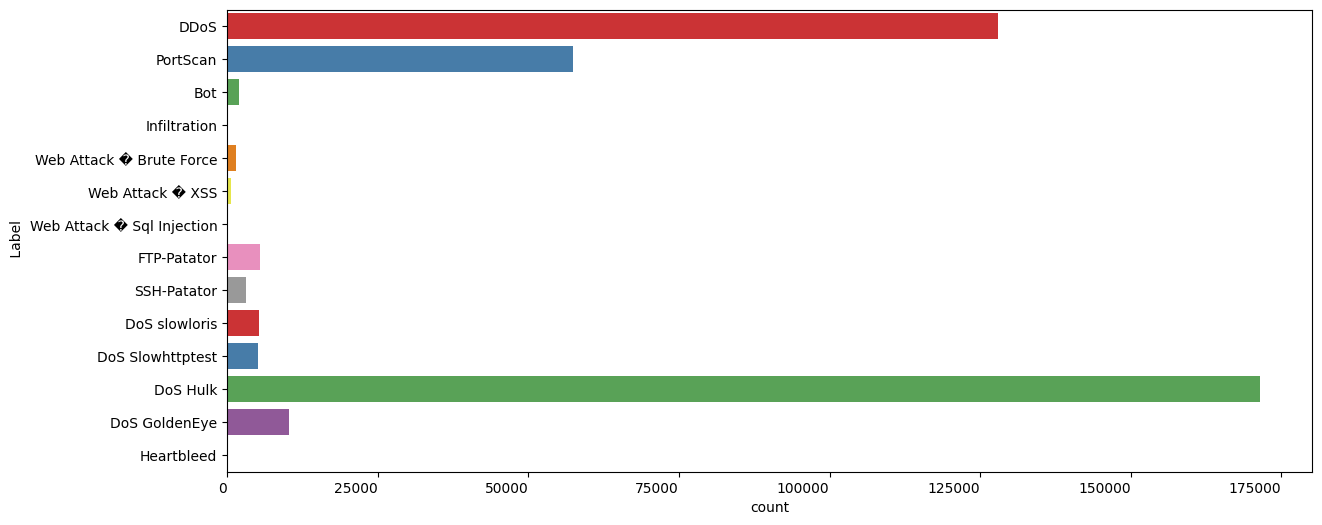

In [15]:
data = dataset[' Label'].where(dataset[' Label'] != "BENIGN")

plt.figure(figsize=(14,6))
# Plotting non-benign data since there are a lot of benign samples
chart = sns.countplot(data, palette="Set1")
plt.xticks(horizontalalignment="right")

# 2. Data Cleaning

This chapter contains data cleaning code. We go through the process of renaming columns, removing NaN and non-finite values (-inf, inf) to get the data ready for visualization and model training.

## 2.1 Renaming columns

In [16]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [17]:
# Here we can see that 'Label' column contains some weird characters. 

dataset["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [18]:
# Removing the weird characters

label_names = dataset['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [l.replace("__", "_") for l in label_names]

label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

In [19]:
prev_labels = dataset['Label'].unique()
prev_labels

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [21]:
# Replacing Previous labels with the cleaned labels
for i in range(len(label_names)):
    dataset['Label'] = dataset['Label'].replace({prev_labels[i] : label_names[i]})
    
dataset['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

## 2.2 Removing NULL values

In [22]:
dataset.isnull().values.any()

True

In [23]:
# Check which column has null value and 

[col for col in dataset if dataset[col].isnull().values.any()]

['FlowBytes/s']

In [24]:
# Check how many rows have it
dataset['FlowBytes/s'].isnull().sum()

334

In [25]:
# Since only a small number of rows contain NULL value, We will remove them
dataset.dropna(inplace=True)

In [26]:
# Observe that null valued rows are successfully removed
dataset.isnull().values.any()

False

## 2.3 Removing *non-finite* values

In [27]:
# Removing label column for now because it has string values

label = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [28]:
# Checking if all values are finite.

np.all(np.isfinite(dataset))

False

In [29]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [30]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowPackets/s']).sum()

# Infinite = Total - Finite 
dataset.shape[0] - finite

1132

In [31]:
# Since there is a small number of non-finite values we can safely remove them from the dataset without spoiling the dataset

# Replacing infinite values with NaN values.
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [32]:
# We can see that now we have Nan values again.

np.any(np.isnan(dataset))

True

In [33]:
# Adding the Labels column back again

dataset = dataset.merge(label, how='outer', left_index=True, right_index=True)

In [34]:
# Removing new NaN values.

dataset.dropna(inplace=True)

In [35]:
dataset.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# 3. Data preparation

In this chapter, final data preparation steps are taken before we use the data for model traning and testing.

These steps include:

* Data scaling
* Label encoding
* Data splitting

## 3.1 Scaling the data

For scaling the data, we use RobustScaler class from sklearn.
RobustScaler scales the data using statistics that are robust to outliers. 
It subtracts the median and scales the data according to the interquartile range (IQR), 
which is the difference between the 75th and 25th percentiles.

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
# Splitting dataset into features and labels.

labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [38]:
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)
print("Center:", scaler.center_)
print("Scale:", scaler.scale_)

Center: [8.00000000e+01 6.05180000e+04 2.00000000e+00 2.00000000e+00
 6.80000000e+01 1.62000000e+02 4.10000000e+01 2.00000000e+00
 3.70000000e+01 0.00000000e+00 1.01000000e+02 0.00000000e+00
 9.20000000e+01 0.00000000e+00 3.28651598e+03 6.53936699e+01
 2.33700000e+04 1.39265545e+04 4.88390000e+04 4.00000000e+00
 4.90000000e+01 4.90000000e+01 0.00000000e+00 4.90000000e+01
 3.00000000e+00 3.00000000e+00 3.00000000e+00 0.00000000e+00
 3.00000000e+00 3.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.40000000e+01 4.00000000e+01
 3.28256303e+01 1.65700083e+01 2.00000000e+00 1.07000000e+02
 6.52307692e+01 3.39587986e+01 1.15320000e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 8.30000000e+01 3.70000000e+01 9.20000000e+01 6.40000000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.00000000e+00 6.80000000e+01
 2.00000000e+00 

In [40]:
# Checking if scaling has been succesful.
features[0]

array([ 1.40474359e+02, -1.08800488e-02,  0.00000000e+00, -5.00000000e-01,
       -1.73374613e-01, -1.01886792e-01, -1.57657658e-01,  1.08108108e-01,
       -6.59574468e-01,  0.00000000e+00, -1.11356119e-01,  0.00000000e+00,
       -4.00833491e-01,  0.00000000e+00,  6.24025254e+01,  4.40008275e+01,
       -3.54918620e-02, -8.36254323e-03, -9.42871935e-03, -1.47058824e-02,
       -8.75642074e-06, -5.47273279e-05,  0.00000000e+00, -9.27606653e-06,
        0.00000000e+00, -1.75808720e-05, -9.01237850e-05,  0.00000000e+00,
       -2.23633599e-05, -6.38297872e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.14285714e-01, -3.57142857e-01,
        7.96727544e+01, -8.97344275e-02,  1.08108108e-01, -7.19629498e-02,
       -3.65960885e-01, -9.30566480e-02, -8.52278784e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
       -4.14028384e-01, -

## 3.2 Label encoding

Label encoding is done when dataset contains categorical values (ex. 0-5, A/B/C, 55+). It is used to turn categorical values into numerical values by replacing data categories with integers starting with 0.

'Lable' column contains categorical values - 15 of them (14 types of attacks in our dataset +  1 normal state).

To convert this into numerical values we will use 'LabelEncoder' class from sklearn.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [43]:
# labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [44]:
# Checking that encoding reversal works.

# d = LE.inverse_transform(labels)
# d = pd.Series(d)
# d.unique()

## 3.3 Splitting the data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# For this we will use sklearn function train_test_split().

# 80-20 split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((1940581, 78), (485146, 78), (1940581,), (485146,))

# 4. Model training

We are using feedforward neural network multi-class classifier with backpropagating algorithm. 
NN will be used to classifiy 14 different attacks and 1 normal state

In [47]:
import tensorflow as tf

Our tensorflow Sequential model has 3 layers. Input, 1 hidden and an output layer.

* Input layer has 78 neurons, one for each feature.
* Hidden layer has 67 neurons, this number has been calculated by [formula](https://www.heatonresearch.com/2017/06/01/hidden-layers.html) 2/3 the number of input neurons + number of output neurons.
* Output layer has 15 neurons, one for each class we predict.

For activation functions, we used standard functions for multi-class classification tasks - ReLu for hidden layer and _softmax_ function for output layer.

Finally, we use Dropout parameter set to 0.2 for randomly shutting off 20% of neurons in each learning iteration. This technique is used for decreasing overfitting thereby incresing network accuracy.

In [48]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(78,)),
    tf.keras.layers.Dense(67, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [49]:
# For learning rate optimization we used Adam optimizer.
# Loss function used is sparse categorical crossentropy, which is standard for multiclass classification problems.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In the next cell we setup training logs for tensorboard as well as some tensorboard callbacks.

* tensorboard - callback that logs training data.
* EarlyStopping - callback that monitors 'loss (function)' metric and if the loss function does not get better in tne hext 10 iterations, callback stops the training and resotres the network with best weights up untill that iteration.

In [105]:
# log_dir = os.path.join(
#     "train_logs",
#     datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
# )

# # TF callback that sets up TensorBoard with training logs.
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# # TF callback that stops training when best value of validationi loss function is reached. It also
# # restores weights from the best training iteration.
# eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

NameError: name 'datetime' is not defined

In [50]:
features_train.shape

(1940581, 78)

In [51]:
print(features_test[:5])

[[-6.92307692e-02 -4.98560279e-03 -2.50000000e-01 -2.50000000e-01
  -5.26315789e-02 -5.97484277e-02  4.50450450e-02  1.32432432e+00
   2.97872340e-01  0.00000000e+00 -3.74862183e-02  8.07228916e-01
  -1.08922144e-01  0.00000000e+00  4.87704615e-03 -2.90153009e-04
   1.43048896e-02 -8.36254323e-03 -3.09895107e-03  4.82117647e+02
  -9.32749166e-06 -5.82965014e-05  0.00000000e+00 -9.88102739e-06
  -6.12244898e-02 -1.75808720e-05 -9.01237850e-05  0.00000000e+00
  -2.23633599e-05 -6.38297872e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.85714286e-01 -7.14285714e-02
  -2.78071670e-04  7.54318742e-02  1.32432432e+00 -2.85001781e-02
  -5.49733451e-02 -6.77430171e-02 -7.89212716e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.39246725e-03  2.97872340e-01 -1.08922144e-01 -2.85714286e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [53]:
model.fit(features_train,
          labels_train,
          epochs=5,
         )

Epoch 1/5
60644/60644 [==============================] - 63s 1ms/step - loss: 5643.1987 - accuracy: 0.8972
Epoch 2/5
60644/60644 [==============================] - 66s 1ms/step - loss: 2.4727 - accuracy: 0.9083
Epoch 3/5
60644/60644 [==============================] - 65s 1ms/step - loss: 0.7678 - accuracy: 0.9088
Epoch 4/5
60644/60644 [==============================] - 66s 1ms/step - loss: 0.8660 - accuracy: 0.9090
Epoch 5/5
60644/60644 [==============================] - 67s 1ms/step - loss: 0.4505 - accuracy: 0.9092


We can observe that we have an accuracy of 91 percent

In [54]:
# Evaluating model accuracy.
model.evaluate(features_test, labels_test, verbose=2)

15161/15161 - 11s - loss: 0.2905 - accuracy: 0.9109 - 11s/epoch - 697us/step


[0.29052579402923584, 0.9109443426132202]

# 5. Classifying the Data Labels

In [55]:
predictions = model.predict(features_test)

15161/15161 [==============================] - 12s 757us/step


In [56]:
label_names

['BENIGN',
 'DDoS',
 'PortScan',
 'Bot',
 'Infiltration',
 'Web_Attack_Brute_Force',
 'Web_Attack_XSS',
 'Web_Attack_Sql_Injection',
 'FTPPatator',
 'SSHPatator',
 'DoS_slowloris',
 'DoS_Slowhttptest',
 'DoS_Hulk',
 'DoS_GoldenEye',
 'Heartbleed']

In [57]:
predicted_indices = predictions.argmax(axis=1)
predicted_labels = [label_names[i] for i in predicted_indices if label_names[i] != "BENIGN"]
predicted_labels

['PortScan',
 'PortScan',
 'Infiltration',
 'PortScan',
 'Infiltration',
 'DoS_slowloris',
 'Infiltration',
 'PortScan',
 'PortScan',
 'Infiltration',
 'DoS_slowloris',
 'DoS_slowloris',
 'PortScan',
 'DoS_slowloris',
 'PortScan',
 'PortScan',
 'DoS_slowloris',
 'DoS_Slowhttptest',
 'DoS_slowloris',
 'DoS_Slowhttptest',
 'PortScan',
 'PortScan',
 'PortScan',
 'Infiltration',
 'PortScan',
 'DoS_slowloris',
 'PortScan',
 'Infiltration',
 'DoS_slowloris',
 'Infiltration',
 'DoS_slowloris',
 'DoS_slowloris',
 'PortScan',
 'DoS_Slowhttptest',
 'DoS_slowloris',
 'PortScan',
 'PortScan',
 'PortScan',
 'DoS_slowloris',
 'PortScan',
 'Infiltration',
 'PortScan',
 'PortScan',
 'PortScan',
 'PortScan',
 'DoS_slowloris',
 'DoS_slowloris',
 'PortScan',
 'PortScan',
 'PortScan',
 'PortScan',
 'PortScan',
 'Infiltration',
 'DoS_slowloris',
 'PortScan',
 'PortScan',
 'PortScan',
 'DoS_slowloris',
 'Web_Attack_Sql_Injection',
 'PortScan',
 'PortScan',
 'PortScan',
 'Infiltration',
 'PortScan',
 'DoS_sl

In [58]:
# Define a dictionary mapping attack labels to their severity levels
severity_mapping = {
    'BENIGN': 'Low',
    'DDoS': 'High',
    'PortScan': 'Medium',
    'Bot': 'High',
    'Infiltration': 'High',
    'Web_Attack_Brute_Force': 'Medium',
    'Web_Attack_XSS': 'Medium',
    'Web_Attack_Sql_Injection': 'High',
    'FTPPatator': 'Medium',
    'SSHPatator': 'Medium',
    'DoS_slowloris': 'High',
    'DoS_Slowhttptest': 'High',
    'DoS_Hulk': 'High',
    'DoS_GoldenEye': 'High',
    'Heartbleed': 'High'
}

In [59]:
# Get the predicted labels for the attacks
predicted_labels = [label_names[np.argmax(pred)] for i, pred in enumerate(predictions[:1000]) if label_names[np.argmax(pred)] != 'BENIGN']

# Create a list to store the severity levels for each predicted label
severity_levels = [severity_mapping[label] for label in predicted_labels]

# Combine predicted labels and severity levels
predicted_attacks_with_severity = zip(predicted_labels, severity_levels)

# Display the predicted attacks with their severity levels
for attack, severity in predicted_attacks_with_severity:
    print(f"Predicted Attack: {attack}, Severity: {severity}")

Predicted Attack: PortScan, Severity: Medium
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: Infiltration, Severity: High
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: Infiltration, Severity: High
Predicted Attack: DoS_slowloris, Severity: High
Predicted Attack: Infiltration, Severity: High
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: Infiltration, Severity: High
Predicted Attack: DoS_slowloris, Severity: High
Predicted Attack: DoS_slowloris, Severity: High
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: DoS_slowloris, Severity: High
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: PortScan, Severity: Medium
Predicted Attack: DoS_slowloris, Severity: High
Predicted Attack: DoS_Slowhttptest, Severity: High
Predicted Attack: DoS_slowloris, Severity: High
Predicted Attack: DoS_Slowhttptest, Severity: High
Predicted Attack: PortScan, Severity: Medium
Predicted Attack:

In [60]:
# dataset.to_csv("cleaned_dataset.csv", index=False)

In [80]:
model.save('trained_model.keras')

In [62]:
dataset = pd.read_csv('cleaned_dataset.csv')

In [63]:
label_names = dataset['Label'].unique()

In [81]:
model = tf.keras.models.load_model('trained_model.keras')

In [65]:
from secret import RealTimeData

real_time_data_instance = RealTimeData()

real_time_data = real_time_data_instance.get_cleaned_real_time_data()

In [66]:
real_time_data

DestinationPort                80.0
FlowDuration               170821.0
TotalFwdPackets                 3.0
TotalBackwardPackets            5.0
TotalLengthofFwdPackets        26.0
                             ...   
IdleMean                        0.0
IdleStd                         0.0
IdleMax                         0.0
IdleMin                         0.0
Label                          DDoS
Name: 177096, Length: 79, dtype: object

In [67]:
real_time_df = pd.DataFrame([real_time_data])

In [68]:
labels = real_time_df['Label']
features = real_time_df.loc[:, real_time_df.columns != 'Label'].astype('float64')

In [69]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 177096 to 177096
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DestinationPort          1 non-null      float64
 1   FlowDuration             1 non-null      float64
 2   TotalFwdPackets          1 non-null      float64
 3   TotalBackwardPackets     1 non-null      float64
 4   TotalLengthofFwdPackets  1 non-null      float64
 5   TotalLengthofBwdPackets  1 non-null      float64
 6   FwdPacketLengthMax       1 non-null      float64
 7   FwdPacketLengthMin       1 non-null      float64
 8   FwdPacketLengthMean      1 non-null      float64
 9   FwdPacketLengthStd       1 non-null      float64
 10  BwdPacketLengthMax       1 non-null      float64
 11  BwdPacketLengthMin       1 non-null      float64
 12  BwdPacketLengthMean      1 non-null      float64
 13  BwdPacketLengthStd       1 non-null      float64
 14  FlowBytes/s              

In [70]:
labels.head()

177096    DDoS
Name: Label, dtype: object

In [71]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [72]:
np.unique(labels)

array([0])

In [73]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
177096,80.0,170821.0,3.0,5.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,...,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
labels

array([0])

In [75]:
predictions = model.predict(features)

1/1 [==============================] - 0s 142ms/step


In [76]:
predicted_indices = predictions.argmax(axis=1)
predicted_labels = [label_names[i] for i in predicted_indices]
predicted_labels

['DoS_slowloris']

In [77]:
# Get the predicted labels for the attacks
predicted_labels = [label_names[np.argmax(pred)] for i, pred in enumerate(predictions[:1000]) if label_names[np.argmax(pred)] != 'BENIGN']

# Create a list to store the severity levels for each predicted label
severity_levels = [severity_mapping[label] for label in predicted_labels]

# Combine predicted labels and severity levels
predicted_attacks_with_severity = zip(predicted_labels, severity_levels)

# Display the predicted attacks with their severity levels
for attack, severity in predicted_attacks_with_severity:
    print(f"Predicted Attack: {attack}, Severity: {severity}")

Predicted Attack: DoS_slowloris, Severity: High
